In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
df1 = pd.read_csv('Dataset/CleanedData/Transactions.csv')
df2 = pd.read_csv('Dataset/CleanedData/NewCustomerList.csv')
df3 = pd.read_csv('Dataset/CleanedData/CustomerDemographic.csv')
df4 = pd.read_csv('Dataset/CleanedData/CustomerAddress.csv')

In [3]:
df1_3 = pd.merge(df1,df3, on= ['customer_id'])
df = pd.merge(df1_3, df4, on= ['customer_id'])

In [4]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,False,True,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,False,True,10.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,False,True,10.0,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,False,True,10.0,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,False,True,10.0,4 Shopko Circle,2196,NSW,Australia,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19959 entries, 0 to 19958
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19959 non-null  int64  
 1   product_id                           19959 non-null  int64  
 2   customer_id                          19959 non-null  int64  
 3   transaction_date                     19959 non-null  object 
 4   online_order                         19959 non-null  float64
 5   order_status                         19959 non-null  object 
 6   brand                                19959 non-null  object 
 7   product_line                         19959 non-null  object 
 8   product_class                        19959 non-null  object 
 9   product_size                         19959 non-null  object 
 10  list_price                           19959 non-null  float64
 11  standard_cost               

In [6]:
df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
count,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000
mean,9997.858710,45.368806,1741.023699,0.502179,1107.621530,555.949106,38197.923526,48.752793,10.684854,2987.164587,7.516158
std,5773.434376,30.747991,1009.396333,0.500008,582.872029,403.892561,2860.912117,28.616982,5.608873,851.224326,2.825401
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,33259.000000,0.000000,1.000000,2000.000000,1.000000
25%,4998.500000,18.000000,864.000000,0.000000,575.270000,215.140000,35667.000000,24.000000,6.000000,2200.000000,6.000000
50%,9997.000000,44.000000,1740.000000,1.000000,1163.890000,507.580000,38206.000000,48.000000,11.000000,2767.000000,8.000000
75%,14995.500000,72.000000,2615.000000,1.000000,1635.300000,795.100000,40672.000000,73.000000,15.000000,3752.000000,10.000000
max,20000.000000,100.000000,3500.000000,1.000000,2091.470000,1759.850000,42710.000000,99.000000,22.000000,4883.000000,12.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                  0
first_name                               0
last_name                              642
gender                                   0
past_3_years_bike_related_purchases      0
dob                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure     

In [9]:
#filling null values using ffill
df['last_name'].fillna(method='ffill', inplace = True)

In [10]:
#filling null values using ffill
df['dob'].fillna(method='ffill', inplace = True)

In [11]:
df.isnull().any().sum()

0

In [12]:
df['dob'] = pd.to_datetime(df['dob'])

In [13]:
df.dtypes

transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                               object
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                       float64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                   

In [14]:
#adding an age column 
ref_date = dt.datetime.now()
df['Age'] = df['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

In [15]:
#removing outliers of age
df = df[df['Age']<100]

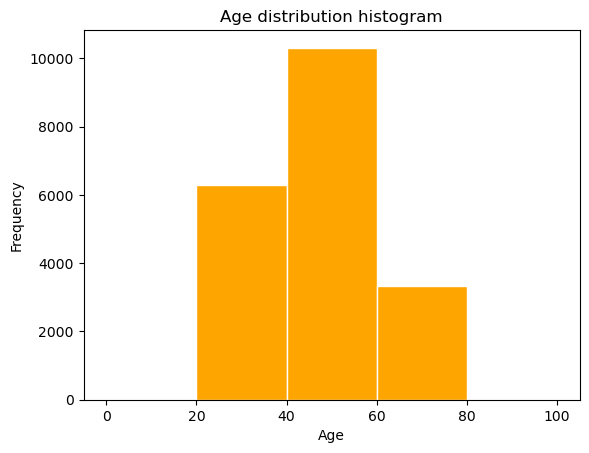

In [16]:
plt.hist(df['Age'], color = 'orange', edgecolor = 'white', bins=[0,20,40,60,80,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

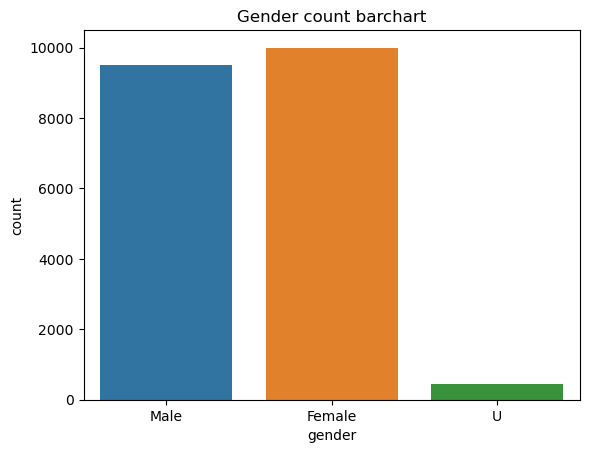

In [17]:
sns.countplot(data=df, x='gender')
plt.title('Gender count barchart')
plt.show()

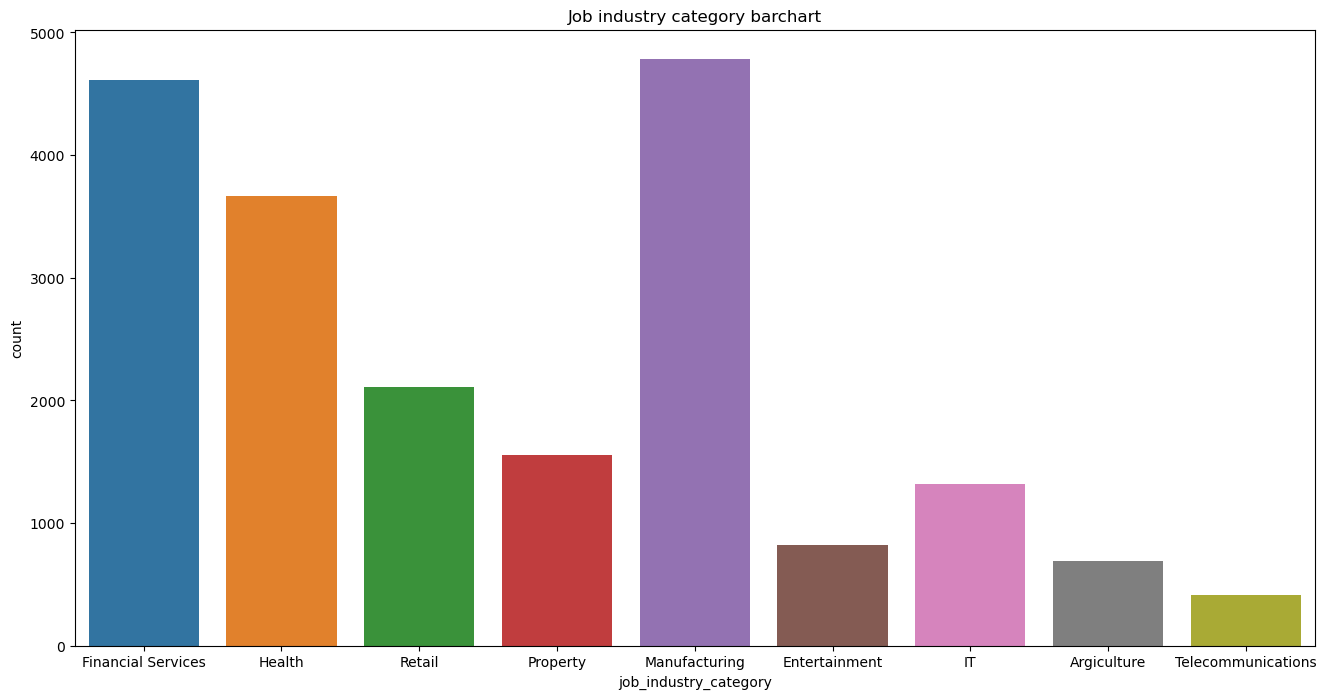

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='job_industry_category')
plt.title('Job industry category barchart')
plt.show()

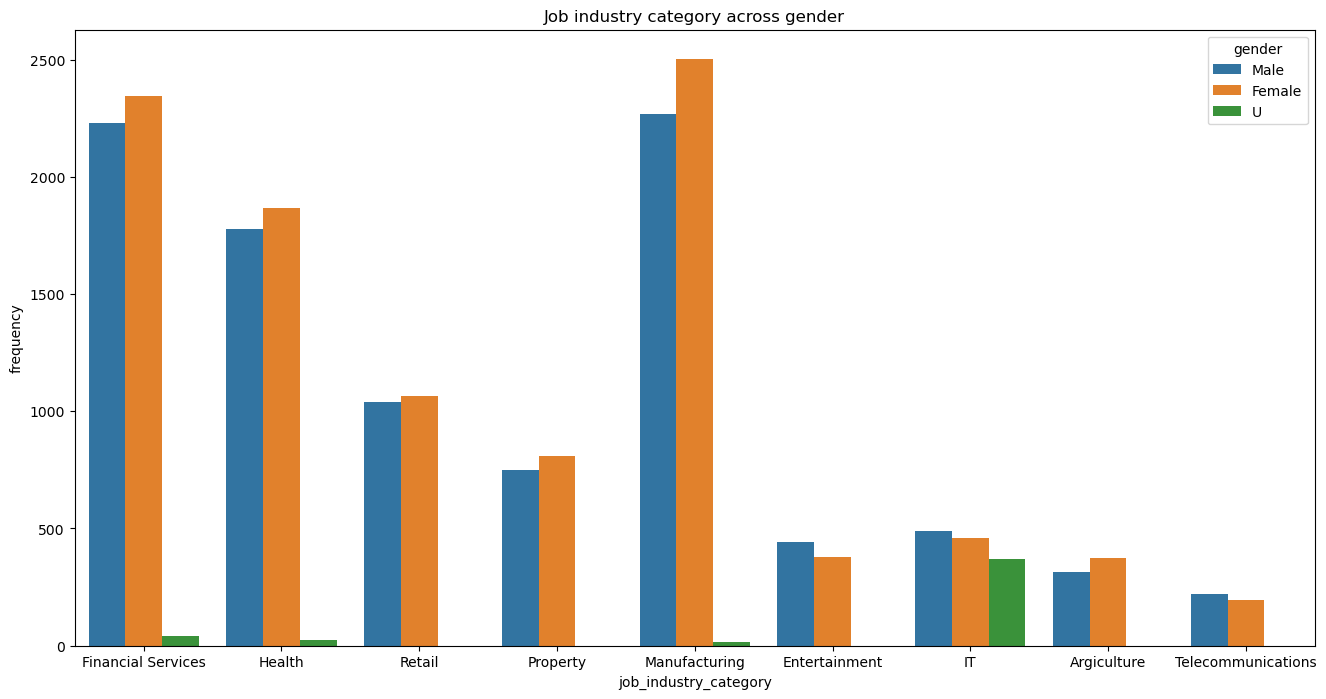

In [19]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='job_industry_category', hue='gender')
plt.title('Job industry category across gender')
plt.ylabel("frequency")
plt.show()

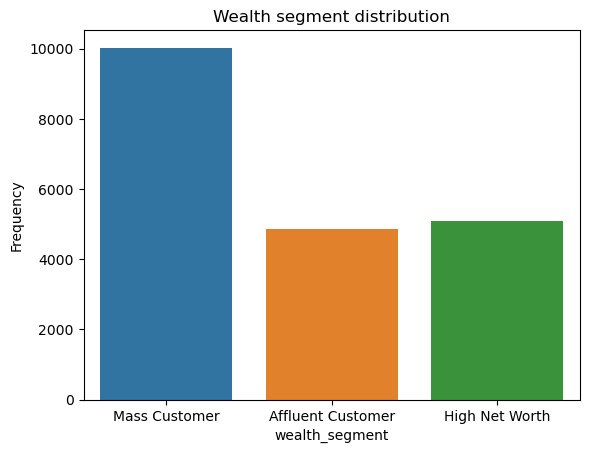

In [20]:
sns.countplot(data=df, x='wealth_segment')
plt.title('Wealth segment distribution')
plt.ylabel('Frequency')
plt.show()

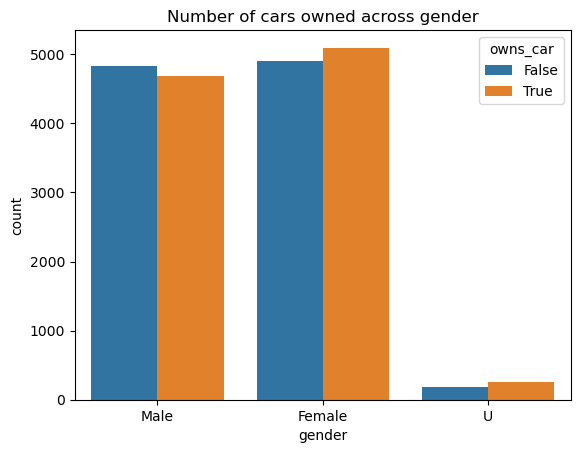

In [21]:
sns.countplot(data=df, x='gender', hue='owns_car')
plt.title('Number of cars owned across gender')
plt.show()

<Figure size 1200x800 with 0 Axes>

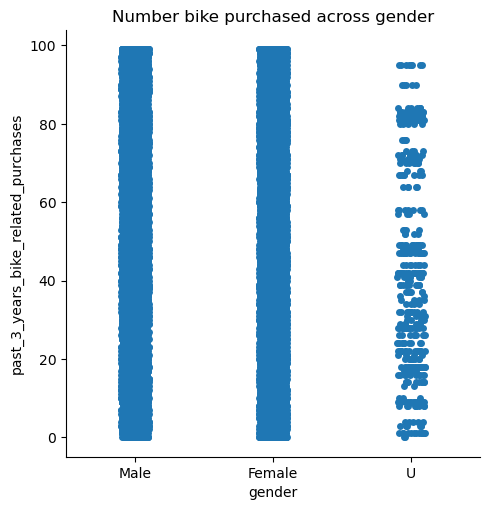

In [22]:
plt.figure(figsize=(12,8))
sns.catplot(data=df, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number bike purchased across gender')
plt.show()

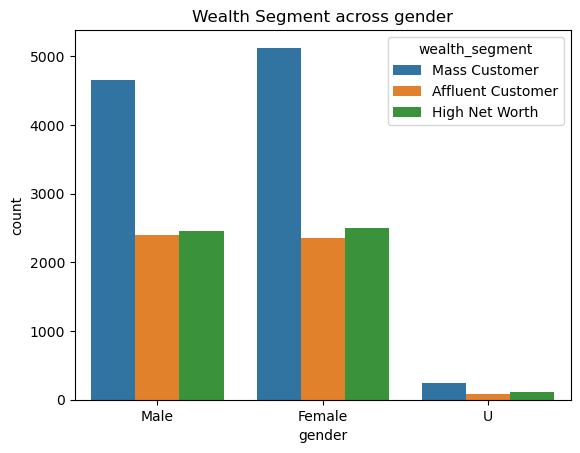

In [23]:
sns.countplot(data=df, x='gender', hue='wealth_segment')
plt.title('Wealth Segment across gender')
plt.show()

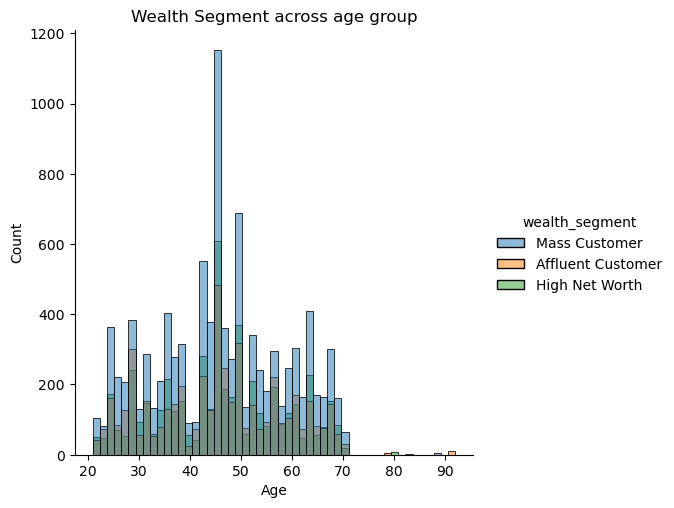

In [24]:
sns.displot(data=df, x='Age', hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.show()

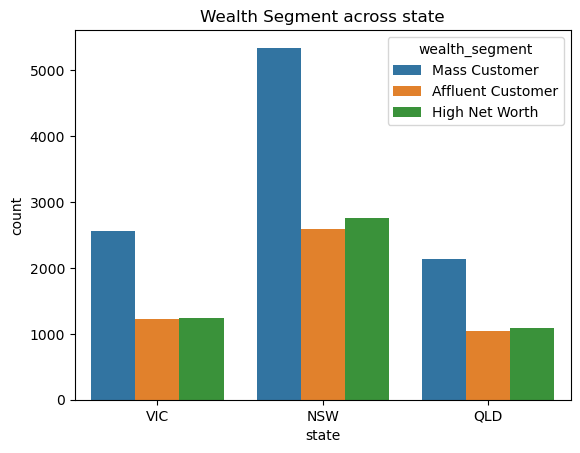

In [25]:
sns.countplot(data=df, x='state', hue='wealth_segment')
plt.title('Wealth Segment across state')
plt.show()

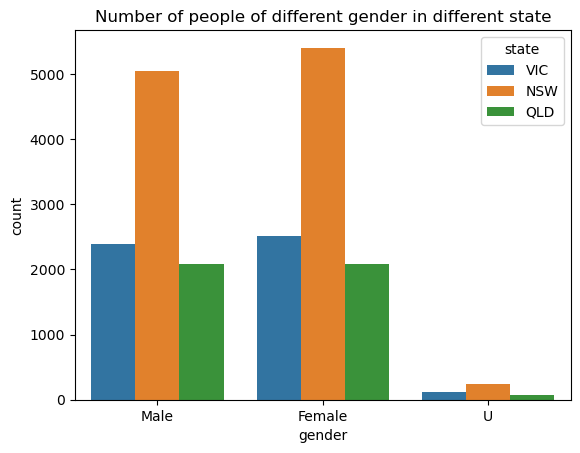

In [26]:
sns.countplot(data=df, x='gender', hue='state')
plt.title('Number of people of different gender in different state')
plt.show()

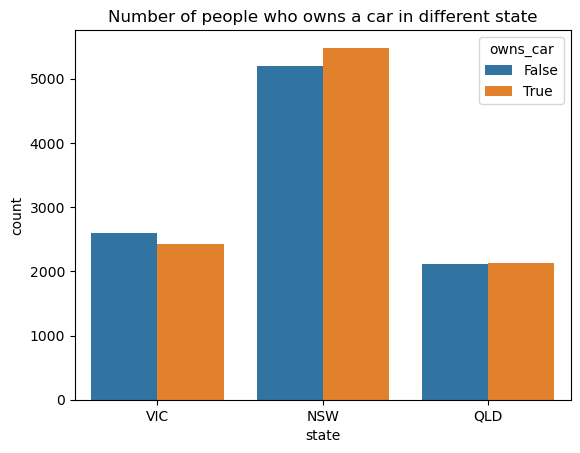

In [27]:
sns.countplot(data = df, x='state', hue='owns_car')
plt.title('Number of people who owns a car in different state')
plt.show()

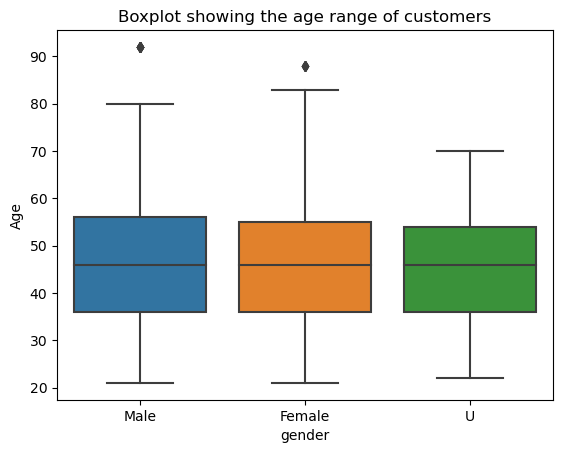

In [28]:
sns.boxplot(data=df, x='gender', y='Age')
plt.title('Boxplot showing the age range of customers')
plt.show()

In [29]:
#data analysis on the new customer list
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            1000 non-null   object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   dob                                  1000 non-null   object 
 5   job_title                            1000 non-null   object 
 6   job_industry_category                1000 non-null   object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [31]:
df2.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,rank,value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [32]:
df2.duplicated().sum()

0

In [33]:
df2.isna().any().sum()

0

In [34]:
df2['new_customer_id'] = df2.index

In [35]:
df2['dob'] = pd.to_datetime(df2['dob'], errors='coerce')

In [36]:
df2.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
rank                                            int64
value                                         float64
new_customer_id             

In [37]:
df2['dob'] = df2['dob'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [38]:
df2['dob'].astype('datetime64')

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: dob, Length: 1000, dtype: datetime64[ns]

In [39]:
ref_date2 = dt.datetime.now()
df2['Age'] = df2['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date2, freq = 'Y')) if str(x) else None)

In [40]:
df2 = df2[df2.Age < 100]

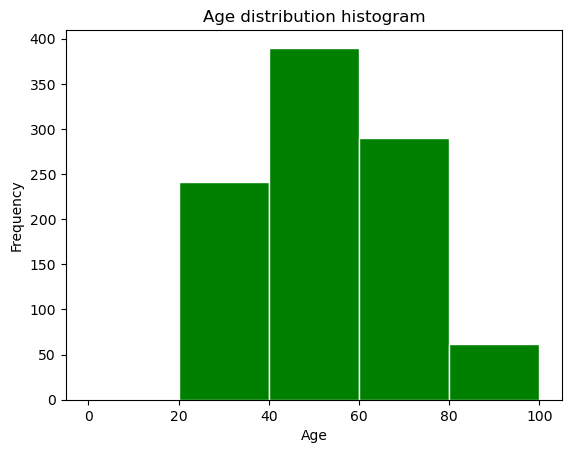

In [41]:
plt.hist(df2['Age'], color = 'green', edgecolor = 'white', bins=[0,20,40,60,80,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

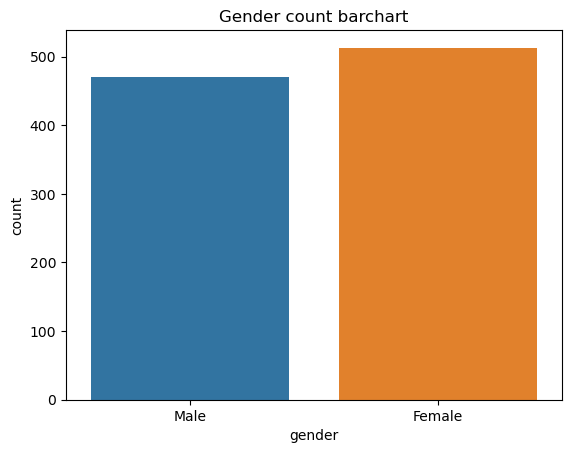

In [42]:
sns.countplot(data=df2, x='gender')
plt.title('Gender count barchart')
plt.show()

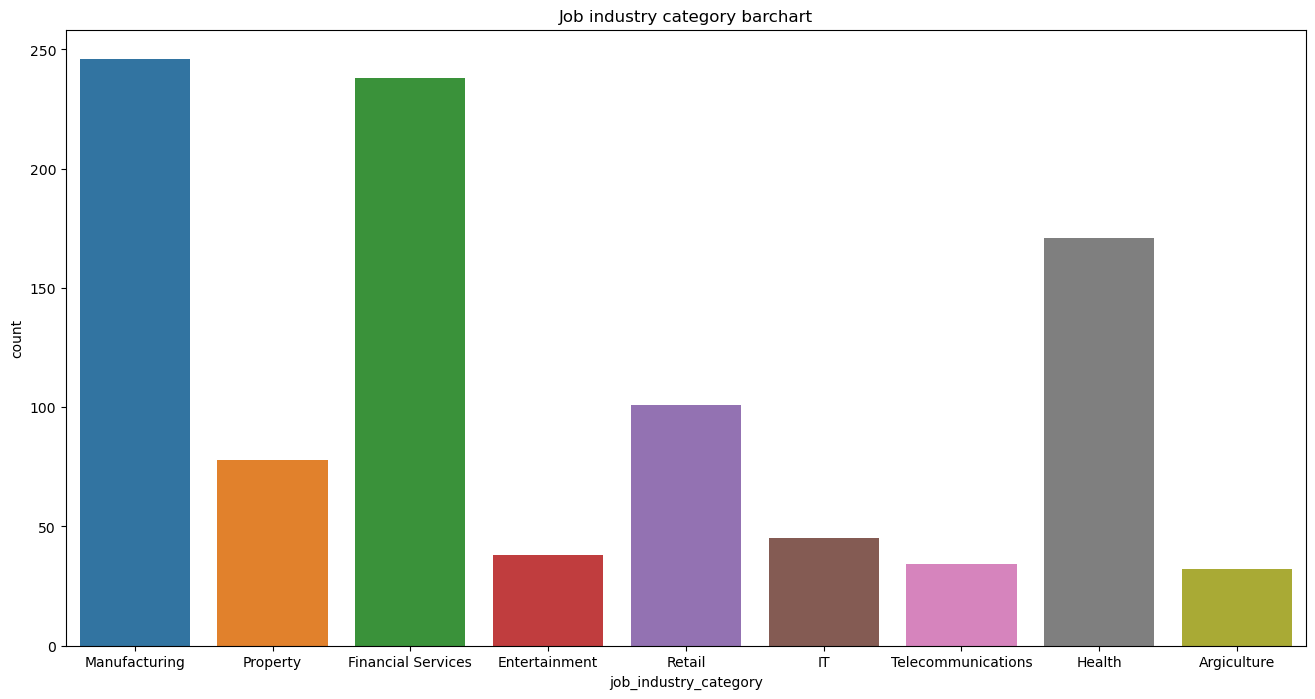

In [43]:
plt.figure(figsize=(16,8))
sns.countplot(data=df2, x='job_industry_category')
plt.title('Job industry category barchart')
plt.show()

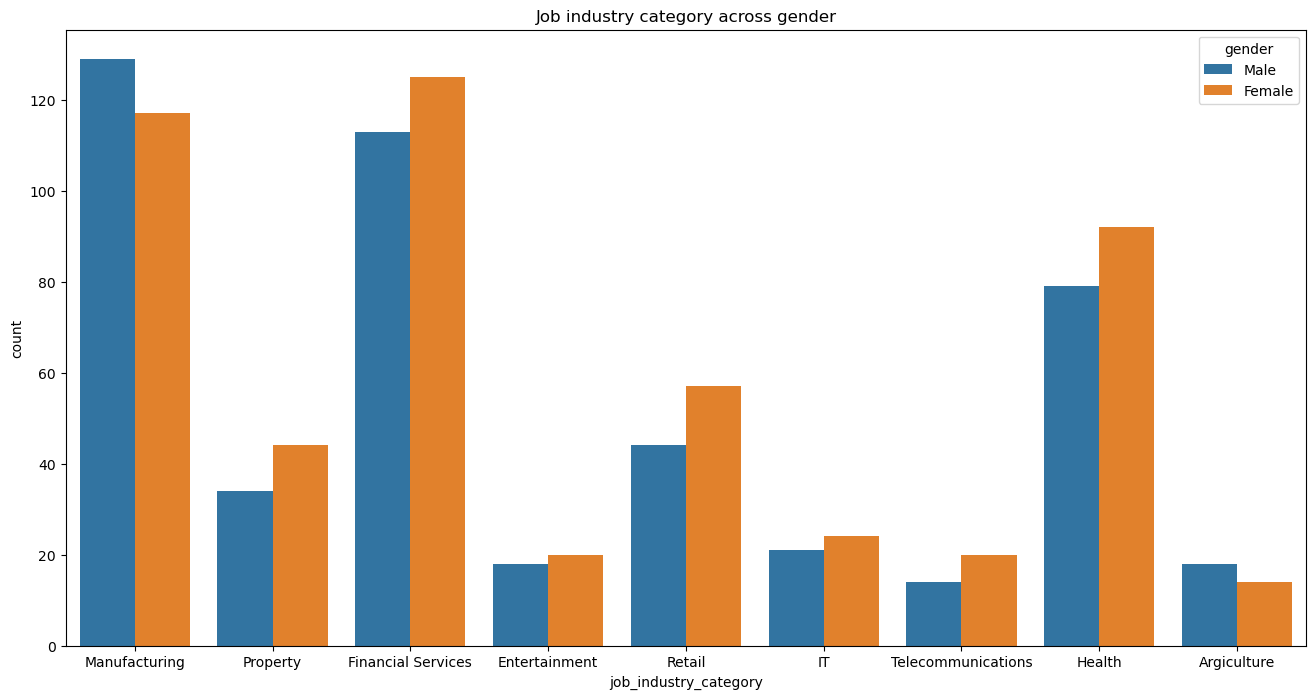

In [44]:
plt.figure(figsize=(16,8))
sns.countplot(data=df2, x='job_industry_category', hue='gender')
plt.title('Job industry category across gender')
plt.show()

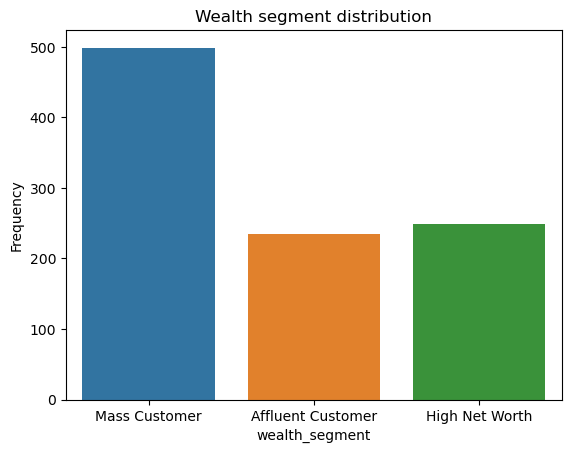

In [45]:
sns.countplot(data=df2, x='wealth_segment')
plt.title('Wealth segment distribution')
plt.ylabel('Frequency')
plt.show()


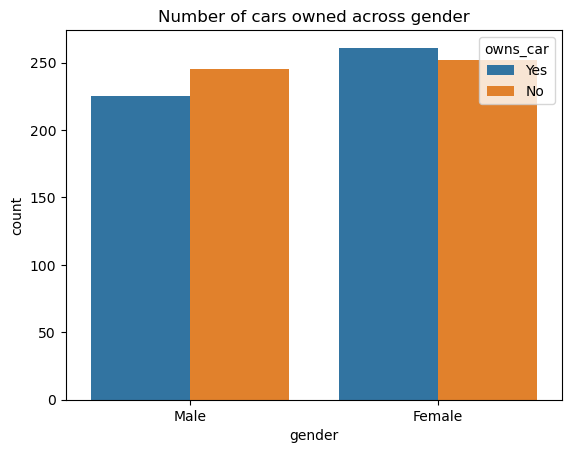

In [46]:
sns.countplot(data=df2, x='gender', hue='owns_car')
plt.title('Number of cars owned across gender')
plt.show()

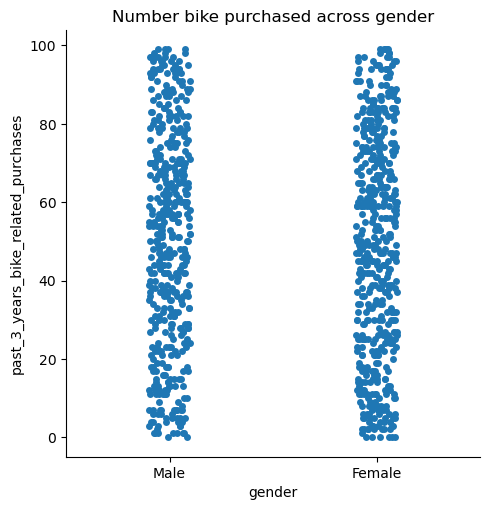

In [47]:
sns.catplot(data=df2, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number bike purchased across gender')
plt.show()

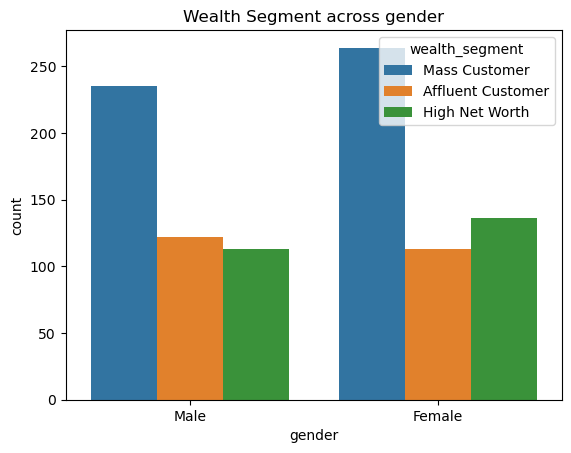

In [48]:
sns.countplot(data=df2, x='gender', hue='wealth_segment')
plt.title('Wealth Segment across gender')
plt.show()

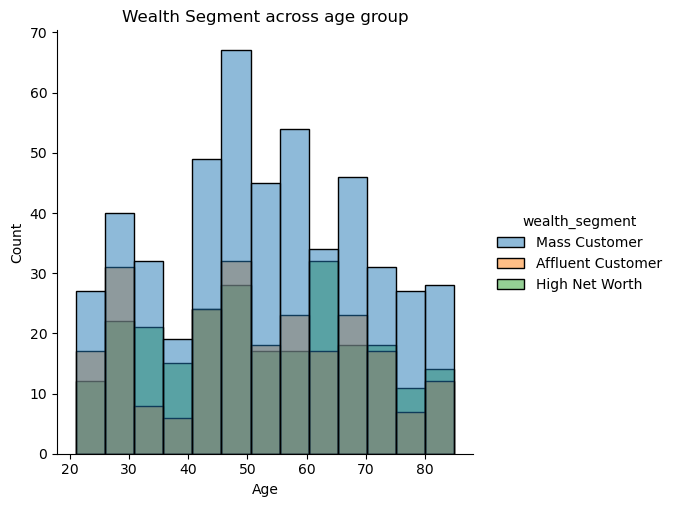

In [49]:
sns.displot(data=df2, x='Age', hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.show()

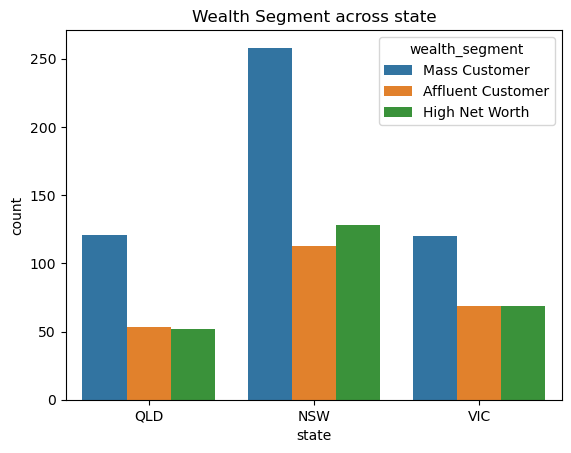

In [50]:
sns.countplot(data=df2, x='state', hue='wealth_segment')
plt.title('Wealth Segment across state')
plt.show()

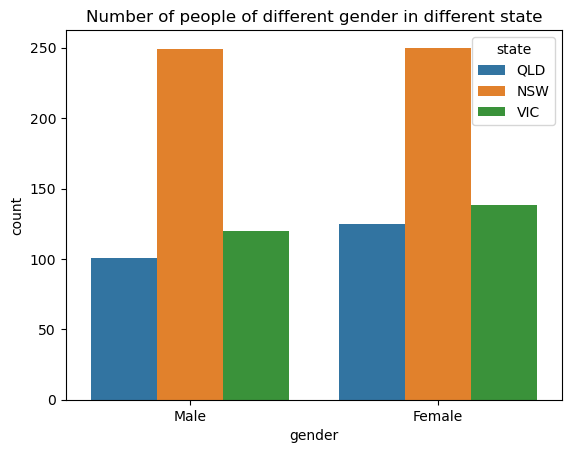

In [51]:
sns.countplot(data=df2, x='gender', hue='state')
plt.title('Number of people of different gender in different state')
plt.show()

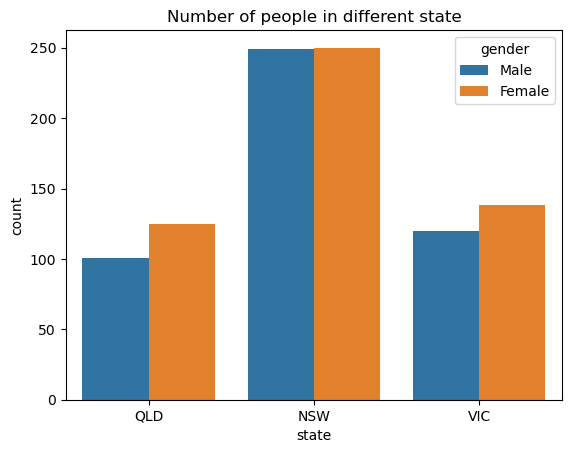

In [52]:
sns.countplot(data = df2, x='state', hue='gender')
plt.title('Number of people in different state')
plt.show()

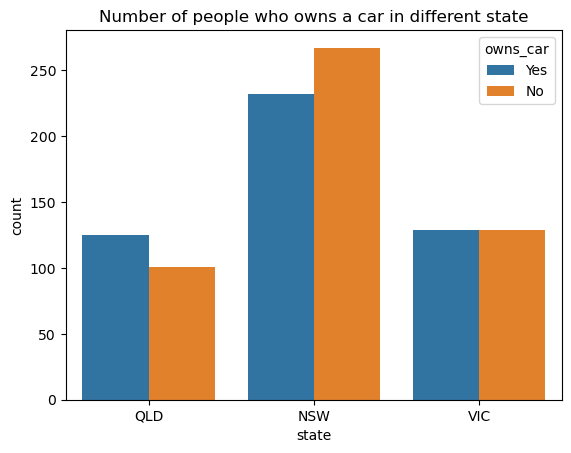

In [53]:
sns.countplot(data=df2, x='state', hue='owns_car')
plt.title('Number of people who owns a car in different state')
plt.show()

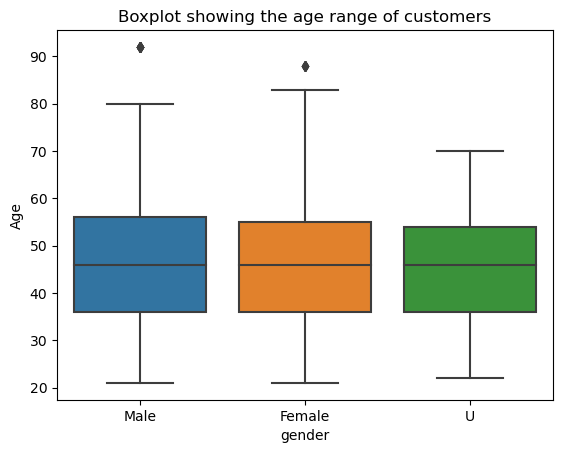

In [54]:
sns.boxplot(data=df, x='gender', y='Age')
plt.title('Boxplot showing the age range of customers')
plt.show()

In [55]:
df.to_excel('Dataset/current_customers.xlsx', sheet_name='current_customers', index=False)
df2.to_excel('Dataset/target_customers.xlsx', sheet_name='target_customers', index=False)